# Report 5

## Dynamic programming

#### Marcin Kapiszewski 156048
#### Adam Tomys 156057

In [1]:
from brute import brute
from greedy import greedy
from dynamic import dynamic
from generate import get_instance
from evaluateProgram import measureTime

import plotly
import plotly.express as px
import pandas as pd
from statistics import mean
from recursive import recursive
from sys import setrecursionlimit

In [2]:
setrecursionlimit(100000)

In [3]:
from IPython import display

In [4]:
def showGraph(df, path, title = "", xLabel = "NumberOfItems"):
    fig = px.line(df, x=xLabel, y="Time", color='Algorithm', title=title)
    fig.write_image(path)

In [5]:
numbersOfItems = [5, 10, 15, 16, 17, 18, 19, 20, 25, 30, 40, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]

In [6]:
def performExperiment(algorithm, numberOfIterations = 10):
    df = pd.DataFrame({"Algorithm": [],
                       "Time": [],
                       "NumberOfItems": []})
    for numberOfItems in numbersOfItems:
        if algorithm.__name__ == "brute" and numberOfItems > 20:
            continue
        if algorithm.__name__  == "recursive" and numberOfItems > 50:
            continue
        times = []
        for _ in range(numberOfIterations):
            instance = get_instance(num_items=numberOfItems)
            times.append(measureTime(algorithm, [instance]))
        time = mean(times)
        df.loc[len(df)] = {"Algorithm": algorithm.__name__,
                       "Time": time,
                       "NumberOfItems": numberOfItems}
    return df

In [7]:
cumulativeDF = pd.DataFrame({"Algorithm": [],
                       "Time": [],
                       "NumberOfItems": []})

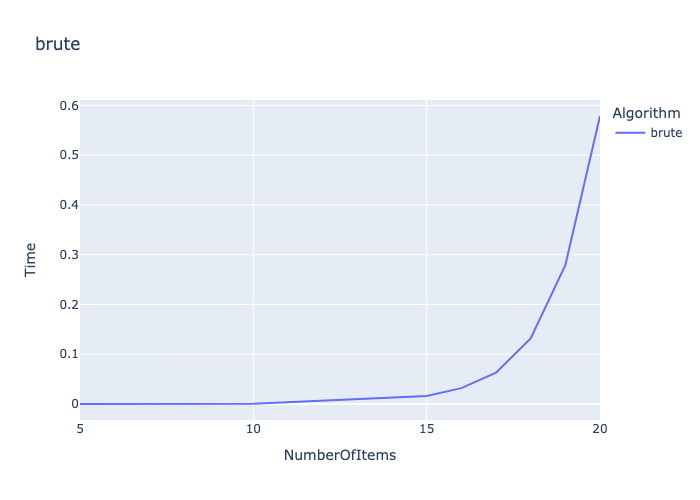

In [8]:
df = performExperiment(brute)
cumulativeDF = pd.concat([cumulativeDF, df])
title = "brute"
path = f"graphs/{title}.png"
showGraph(df, path, title)
display.Image(path)

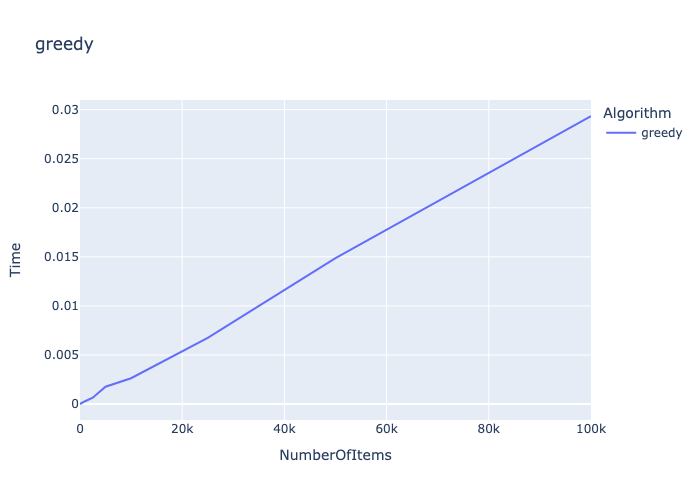

In [9]:
df = performExperiment(greedy)
cumulativeDF = pd.concat([cumulativeDF, df])
title = "greedy"
path = f"graphs/{title}.png"
showGraph(df, path, title)
display.Image(path)

In [10]:
df = performExperiment(dynamic)
cumulativeDF = pd.concat([cumulativeDF, df])
title = "dynamic"
path = f"graphs/{title}.png"
showGraph(df, path, title)
display.Image(path)

In [ ]:
df = performExperiment(recursive)
cumulativeDF = pd.concat([cumulativeDF, df])
title = "recursive"
path = f"graphs/{title}.png"
showGraph(df, path, title)
display.Image(path)

KeyboardInterrupt: 

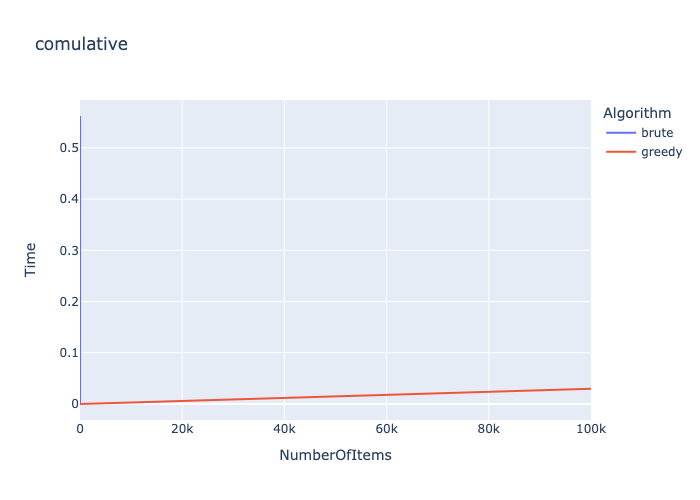

In [ ]:
title = "comulative"
path = f"graphs/{title}.png"
showGraph(cumulativeDF, path, title)
display.Image(path)

### Difficulties
- Testing parameters was time-consuming as we wanted unbiased results
- Implementing algorithms took a long time
- We had to keep in mind the solution we wanted to pass to oracle 

### Conclusions
- Dynamic programming algorithm was extremelly efficient despite NP-completness of the problem
- Brute force and Recursive algorithms also solve the problem but in inefficient way, we could only test these algorithms up to 20 and 50 items respectivally, due to slow performance
- On the contrary dynamic programming was easily able to solve really large instances with complexity of N*M (capacity*nunm_items)
- brute force is so fast partially due to the fact that in-built sort is implemented in C
- The raport show that there exist effiencient methods of solving NP-complete problems